# Intro to Pandas

In [1]:
import numpy as np
import pandas as pd
import math
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import os
%matplotlib notebook

In [2]:
# get Pansda's vesrion #
print ('Pandas version ' + pd.__version__)

Pandas version 0.23.0


In [3]:
# record-setting temperatures in Ohio cities on Jan 7 2014   
city = ['Akron-Canton', 'Mansfield', 'Cleveland', 'Toledo', 'Youngstown', 'Columbus', 'ew Philadelphia', 'Zanesville']
temperature=[-11, -12, -11, -14, -12, -7, -9, -8]

In [4]:
# create a zipped oabject (list of tuples)
record_temps = zip(city,temperature)
print (record_temps)

In [5]:
# create a Panda dataframe
df = DataFrame(data = list(record_temps), columns=['City', 'Temperature'])
df

City  Temperature
0     Akron-Canton          -11
1        Mansfield          -12
2        Cleveland          -11
3           Toledo          -14
4       Youngstown          -12
5         Columbus           -7
6  ew Philadelphia           -9
7       Zanesville           -8

In [6]:
# save the frames out to csv files 
df.to_csv('tempJan72014-1.csv',index=False,header=False)
df.to_csv('tempJan72014-2.csv',index=True,header=False)
df.to_csv('tempJan72014-3.csv',index=False,header=True)
df.to_csv('tempJan72014-4.csv',index=True,header=True)

In [7]:
# read the saved files and see what the different "writes" gave us
df1 = pd.read_csv('tempJan72014-1.csv')
df2 = pd.read_csv('tempJan72014-2.csv')
df3 = pd.read_csv('tempJan72014-3.csv')
df4 = pd.read_csv('tempJan72014-4.csv')

In [8]:
df1

Akron-Canton  -11
0        Mansfield  -12
1        Cleveland  -11
2           Toledo  -14
3       Youngstown  -12
4         Columbus   -7
5  ew Philadelphia   -9
6       Zanesville   -8

In [9]:
df2

0     Akron-Canton  -11
0  1        Mansfield  -12
1  2        Cleveland  -11
2  3           Toledo  -14
3  4       Youngstown  -12
4  5         Columbus   -7
5  6  ew Philadelphia   -9
6  7       Zanesville   -8

In [10]:
df3 # this seems the best way to write out a csv file

City  Temperature
0     Akron-Canton          -11
1        Mansfield          -12
2        Cleveland          -11
3           Toledo          -14
4       Youngstown          -12
5         Columbus           -7
6  ew Philadelphia           -9
7       Zanesville           -8

In [11]:
df4

Unnamed: 0             City  Temperature
0           0     Akron-Canton          -11
1           1        Mansfield          -12
2           2        Cleveland          -11
3           3           Toledo          -14
4           4       Youngstown          -12
5           5         Columbus           -7
6           6  ew Philadelphia           -9
7           7       Zanesville           -8

In [12]:
# read without the header
df1 = pd.read_csv('tempJan72014-1.csv', header=None)
df1

0   1
0     Akron-Canton -11
1        Mansfield -12
2        Cleveland -11
3           Toledo -14
4       Youngstown -12
5         Columbus  -7
6  ew Philadelphia  -9
7       Zanesville  -8

In [13]:
# read and assign values to the header
df1 = pd.read_csv('tempJan72014-1.csv', names=['City', 'Temperature'])
df1

City  Temperature
0     Akron-Canton          -11
1        Mansfield          -12
2        Cleveland          -11
3           Toledo          -14
4       Youngstown          -12
5         Columbus           -7
6  ew Philadelphia           -9
7       Zanesville           -8

In [14]:
# compute the min temperature
df['Temperature'].min()

-14

In [15]:
# anothe way to define  a DF
df5 = pd.DataFrame({'City': ['Akron-Canton', 'Mansfield', 'Cleveland', 'Toledo', 'Youngstown', 'Columbus', 'Philadelphia', 'Zanesville'],
                   'Temperature': [-11, -12, -11, -14, -12, -7, -9, -8]})
df5

City  Temperature
0  Akron-Canton          -11
1     Mansfield          -12
2     Cleveland          -11
3        Toledo          -14
4    Youngstown          -12
5      Columbus           -7
6  Philadelphia           -9
7    Zanesville           -8

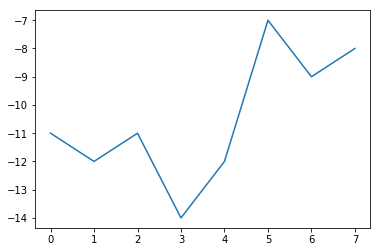

In [16]:
df['Temperature'].plot()

In [17]:
# another way to create a dataframe
df = DataFrame({'int_col' : [1,2,6,8,-1], 'float_col' : [0.1, 0.2,0.2,10.1,None], 'str_col' : ['a','b',None,'c','a']})
df

int_col  float_col str_col
0        1        0.1       a
1        2        0.2       b
2        6        0.2    None
3        8       10.1       c
4       -1        NaN       a

In [18]:
# index through the ix mothod
df.ix[:,['float_col','int_col']]

/home/kdipple1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


float_col  int_col
0        0.1        1
1        0.2        2
2        0.2        6
3       10.1        8
4        NaN       -1

In [19]:
# index through the columns
df[['float_col','int_col']]

float_col  int_col
0        0.1        1
1        0.2        2
2        0.2        6
3       10.1        8
4        NaN       -1

In [20]:
# idex based on a condition
df[df['float_col'] > 0.15]

int_col  float_col str_col
1        2        0.2       b
2        6        0.2    None
3        8       10.1       c

In [21]:
# idex based on a condition
df[df['float_col'] == 0.1]

int_col  float_col str_col
0        1        0.1       a

In [22]:
# another conditional indexing
df[(df['float_col'] > 0.1) & (df['int_col']>2)]

int_col  float_col str_col
2        6        0.2    None
3        8       10.1       c

In [23]:
# another conditional indexing
df[(df['float_col'] > 0.1) | (df['int_col']>2)]

int_col  float_col str_col
1        2        0.2       b
2        6        0.2    None
3        8       10.1       c

In [24]:
# another conditional indexing
df[~(df['float_col'] > 0.1)]

int_col  float_col str_col
0        1        0.1       a
4       -1        NaN       a

In [25]:
# change the name of a column and save the dataframe to a another
df2 = df.rename(columns={'int_col' : 'some_other_name'})
df2

some_other_name  float_col str_col
0                1        0.1       a
1                2        0.2       b
2                6        0.2    None
3                8       10.1       c
4               -1        NaN       a

In [26]:
df

int_col  float_col str_col
0        1        0.1       a
1        2        0.2       b
2        6        0.2    None
3        8       10.1       c
4       -1        NaN       a

In [27]:
# rename it back and replace the existing dataframe
df2.rename(columns={'some_other_name' : 'int_col'}, inplace = True)
df2

int_col  float_col str_col
0        1        0.1       a
1        2        0.2       b
2        6        0.2    None
3        8       10.1       c
4       -1        NaN       a

In [30]:
# drop the missing values
df2.dropna()

int_col  float_col str_col
0        1        0.1       a
1        2        0.2       b
3        8       10.1       c

In [29]:
# deep copy
df3 = df.copy()
df3

int_col  float_col str_col
0        1        0.1       a
1        2        0.2       b
2        6        0.2    None
3        8       10.1       c
4       -1        NaN       a

In [31]:
# compute the mean of the floats
mean = df3['float_col'].mean()
mean

2.65

In [32]:
# then replace the missing values by the mean
X=df3['float_col'].fillna(mean)

In [33]:
X

0     0.10
1     0.20
2     0.20
3    10.10
4     2.65
Name: float_col, dtype: float64

In [34]:
# using map to change the values for a column
df['str_col'].dropna().map(lambda x : 'map_' + x)

0    map_a
1    map_b
3    map_c
4    map_a
Name: str_col, dtype: object

In [36]:
# use the apply method to operate on the columns
df.loc[:,['int_col','float_col']].apply(np.sqrt)

int_col  float_col
0  1.000000   0.316228
1  1.414214   0.447214
2  2.449490   0.447214
3  2.828427   3.178050
4       NaN        NaN

In [ ]:
# use applymap to define a function to operae on the whole dataframe
def some_fn(x):
    if type(x) is str:
        return 'applymap_' + x
    elif x:
        return 100 * x
    else:
        return

    
df.applymap(some_fn)    


In [ ]:
# define a new DF
df = pd.DataFrame(data={"A":[1,2], "B":[1.2,1.3]})
df

In [ ]:
df['A']

In [ ]:
# perform a mathematical operation
df['C'] = df["A"]+df["B"]
df

In [ ]:
# perform another one
df["D"] = df["A"]*3
df

In [ ]:
# and another
df["E"] = np.sqrt(df["A"])
df

In [ ]:
df = pd.DataFrame(data={"A":[1,2], "B":[1.2,1.3], "Z":["a","b"]})
df

In [ ]:
# perform a vectorized operation on strings
df["F"] = df.Z.str.upper()
df

In [ ]:
# deep copy
df = DataFrame({'int_col' : [1,2,6,8,-1], 'float_col' : [0.1, 0.2,0.2,10.1,None], 'str_col' : ['a','b',None,'c','a']})
df4 = df.copy()
def two_three_strings(x):
    return x*2, x*3
df4['twice'],df4['thrice'] = zip(*df4['int_col'].map(two_three_strings))
df4

In [ ]:
# Deep copy
df5 = df.copy()
def sum_two_cols(series):
    return series['int_col'] + series['float_col']
df5['sum_col'] = df5.apply(sum_two_cols,axis=1)
df5

In [ ]:
def int_float_squares(series):
    return pd.Series({'int_sq' : series['int_col']**2, 'flt_sq' : series['float_col']**2})
df.apply(int_float_squares, axis = 1)

In [ ]:
df.describe() #provides quick stats on all suitable columns.

In [ ]:
# compute the covariance
df.cov()

In [ ]:
# compute the correlation
df.corr()

In [ ]:
# define another DF
other = DataFrame({'str_col' : ['a','b'], 'some_val' : [3, 2]})
other

In [ ]:
# merge the two using the intersection of keys from both frames (SQL: inner join)
pd.merge(df,other,on='str_col',how='inner')

In [ ]:
# merge the two using the union of keys from both frames (SQL: inner join)
pd.merge(df,other,on='str_col',how='outer')

In [ ]:
plot_df = DataFrame(np.random.randn(1000,2),columns=['x','y'])

In [ ]:
plot_df['y'] = plot_df['y'].map(lambda x : x + 1)

In [ ]:
plot_df.plot()

In [ ]:
plot_df.hist()

In [ ]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', None, 'CABA', 'dog', 'cat'])

In [ ]:
s

In [ ]:
s.str.lower()

In [ ]:
s.str.upper()

In [ ]:
s.str.len()

In [ ]:
df = pd.read_csv("../data/cereal.csv")

In [ ]:
print(df.head(5))


In [ ]:
# Print the first value in the `fat` column
print(df['fat'][0])

# Print the second value in the `fat` column
print(df['fat'][1])

# Print the sum
print(df['fat'][0] + df['fat'][1])

In [ ]:
print(df['name'])

In [ ]:
df = pd.read_csv("../data/cereal2.csv", na_values = ['no info', '.'])
print(df.head(5))

In [ ]:
# Print the first value in the `fat` column
print(df['fat'][0])

# Print the second value in the `fat` column
print(df['fat'][1])

# Print the sum
print(df['fat'][0] + df['fat'][1])

In [ ]:
df['fat']

In [ ]:
df1 = pd.read_csv("../data/data1.csv")
df2 = pd.read_csv("../data/data2.csv")


In [ ]:
df = pd.concat((df1, df2)).sort_values(by='time')

In [ ]:
df.reset_index(inplace=True, drop=True)


In [ ]:
df